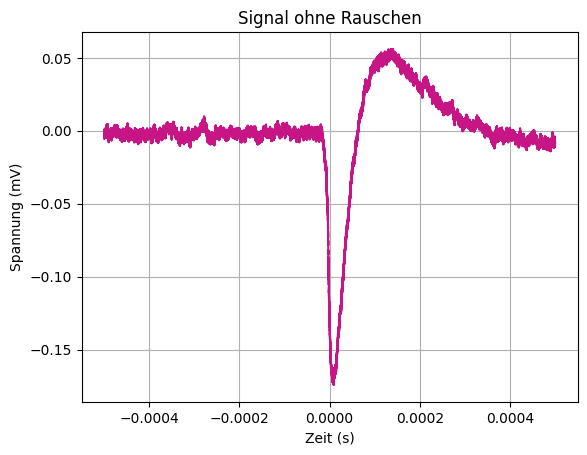

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_signal = '/Users/rojinaksu/PycharmProjects/diy-particle-detector-V2/codes/Signal tests/Alter detektor/Tek000_2.csv'
file_noise = '/Users/rojinaksu/PycharmProjects/diy-particle-detector-V2/codes/Signal tests/Alter detektor/Tek003.csv'

df_signal = pd.read_csv(file_signal, header=None)
df_noise = pd.read_csv(file_noise, header=None)

df_signal.columns = ['time', 'signal']
df_noise.columns = ['time', 'noise']

# Sicherstellen, dass die Zeitachsen gleich sind
if not np.allclose(df_signal['time'], df_noise['time']):
    raise ValueError("Zeitachsen stimmen nicht überein!")

# Rauschkorrektur
x = df_signal['time'].to_numpy()
y = df_signal['signal'] - df_noise['noise']

# Plot
plt.plot(x, y, color='mediumvioletred')
plt.xlabel('Zeit (s)')
plt.ylabel('Spannung (mV)')
plt.grid(True)
plt.title('Signal ohne Rauschen')
plt.show()



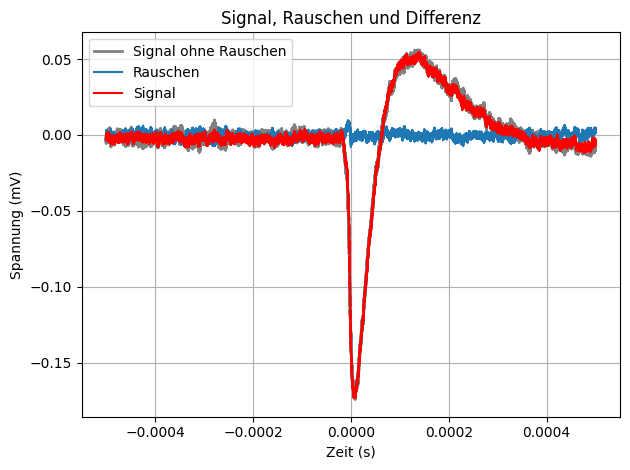

In [13]:
plt.plot(df_signal['time'], y, label='Signal ohne Rauschen', linewidth=2, color='grey' )
plt.plot(df_noise['time'], df_noise['noise'], label='Rauschen')
plt.plot(df_signal['time'], df_signal['signal'], label='Signal', color='red')

plt.xlabel('Zeit (s)')
plt.ylabel('Spannung (mV)')
plt.grid(True)
plt.legend()
plt.title('Signal, Rauschen und Differenz')
plt.tight_layout()
plt.show()

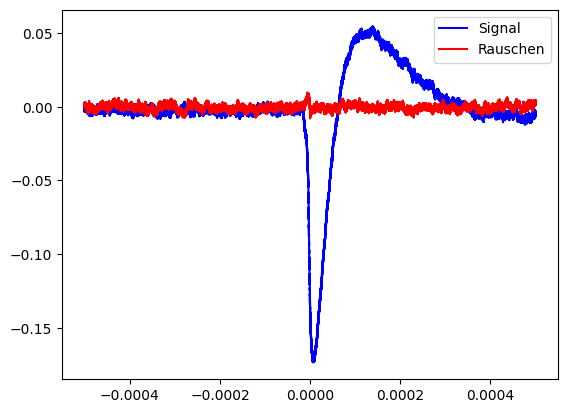

In [14]:
plt.plot(df_signal['time'], df_signal['signal'], label='Signal', color='blue')
plt.plot(df_noise['time'], df_noise['noise'], label='Rauschen', color='red')
plt.legend()
plt.show()

In [17]:
import numpy as np
import pandas as pd

df_signal = pd.read_csv('/Users/rojinaksu/PycharmProjects/diy-particle-detector-V2/codes/Signal tests/Alter detektor/Tek000_2.csv', header=None)
df_noise = pd.read_csv('/Users/rojinaksu/PycharmProjects/diy-particle-detector-V2/codes/Signal tests/Alter detektor/Tek003.csv', header=None)


df_signal.columns = ['time', 'signal']
df_noise.columns = ['time', 'noise']


voltage_diff = df_signal['signal'] - df_noise['noise']

print("⟨Signal⟩:", df_signal['signal'].mean())
print("⟨Rauschen⟩:", df_noise['noise'].mean())
print("⟨Signal – Rauschen⟩:", voltage_diff.mean())


rms_signal = np.sqrt(np.mean(voltage_diff**2))
rms_noise  = np.sqrt(np.mean(df_noise['noise']**2))

# SNR in dB
snr_db = 20 * np.log10(rms_signal / rms_noise)
print("SNR [dB]:", snr_db)


⟨Signal⟩: -0.0011506747329912016
⟨Rauschen⟩: -0.0004031291750000005
⟨Signal – Rauschen⟩: -0.0007475455579911982
SNR [dB]: 24.52993919662072
